In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!dir

 Volume in drive C is Windows8_OS
 Volume Serial Number is 6F69-FCFF

 Directory of C:\Users\aswadi\Documents\personal\master\data_analytics\group assignment

04/03/2020  08:08 PM    <DIR>          .
04/03/2020  08:08 PM    <DIR>          ..
04/03/2020  08:06 PM    <DIR>          .ipynb_checkpoints
04/03/2020  08:00 PM           169,271 london-bike-sharing-dataset.zip
10/10/2019  12:49 PM         1,034,821 london_merged.csv
04/03/2020  08:08 PM               555 Untitled.ipynb
               3 File(s)      1,204,647 bytes
               3 Dir(s)  168,212,140,032 bytes free


In [12]:
df=pd.read_csv('london_merged.csv', low_memory=False)

In [4]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
pd.to_datetime(df.timestamp).min(),pd.to_datetime(df.timestamp).max()

(Timestamp('2015-01-04 00:00:00'), Timestamp('2017-01-03 23:00:00'))

In [5]:
df2=df.copy()

In [6]:
df2['day']=pd.to_datetime(df.timestamp).dt.day
df2['year']=pd.to_datetime(df.timestamp).dt.year
df2['month']=pd.to_datetime(df.timestamp).dt.month
df2['hr']=pd.to_datetime(df.timestamp).dt.hour
df2['dayofweek']=pd.to_datetime(df.timestamp).dt.dayofweek
df2['period']=(pd.to_datetime(df.timestamp).dt.hour % 24 + 4) // 4
# df2['period'].replace({1: 'Late Night',
#                       2: 'Early Morning',
#                       3: 'Morning',
#                       4: 'Noon',
#                       5: 'Evening',
#                       6: 'Night'}, inplace=True)
df2.drop('timestamp', axis=1, inplace=True)  

In [7]:
df2.sample(5).T

,5575,15784,10665,15933,991
cnt,393.0,331.0,2886.0,735.0,633.0
t1,15.5,14.0,14.0,4.0,7.0
t2,15.5,14.0,14.0,2.0,5.0
hum,85.5,72.0,42.5,87.0,93.0
wind_speed,23.0,24.0,12.0,8.0,10.0
weather_code,7.0,4.0,1.0,1.0,2.0
is_holiday,0.0,0.0,1.0,0.0,0.0
is_weekend,0.0,0.0,0.0,0.0,1.0
season,1.0,2.0,0.0,2.0,3.0
day,24.0,28.0,25.0,3.0,14.0


In [40]:
df2.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,year,month,hr,dayofweek,period
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,-0.017887,0.010046,0.063757,0.324423,-0.068688,0.341065
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,0.005072,-0.037959,0.332712,0.168708,-0.002317,0.170818
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,0.006791,-0.044972,0.368366,0.153956,-0.006824,0.155917
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,-0.020868,0.072443,0.113149,-0.295653,0.011556,-0.299379
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,0.002040,-0.094739,-0.086383,0.141792,0.001708,0.143325
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,0.001904,-0.009234,-0.033253,-0.041786,0.020619,-0.042472
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.042657,0.034631,-0.011511,-0.000288,-0.144628,-0.000298
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.005721,0.003049,-0.005406,0.001803,0.791975,0.001875
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,-0.006460,0.024400,0.203249,0.000006,0.002356,0.000014
day,-0.017887,0.005072,0.006791,-0.020868,0.002040,0.001904,0.042657,0.005721,-0.006460,1.000000,-0.021935,0.012614,-0.000310,0.006974,-0.000332


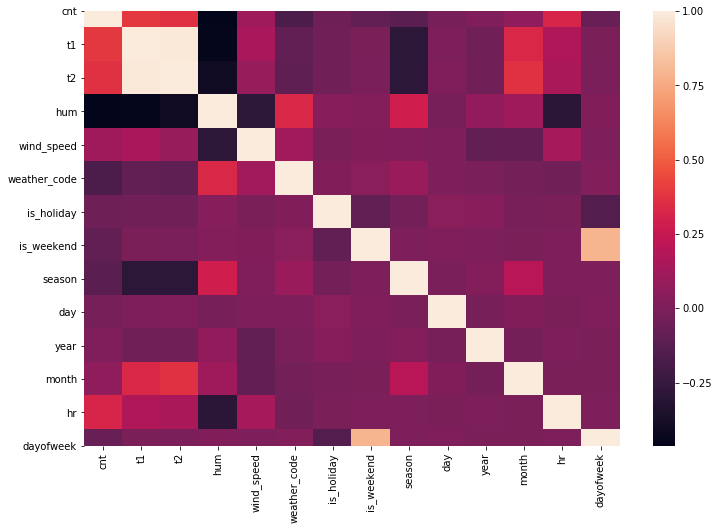

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr());

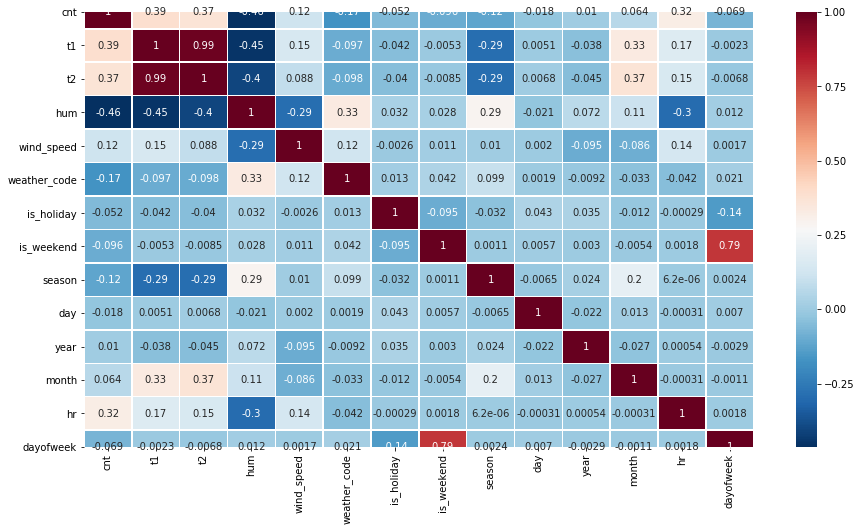

In [61]:
pearsoncorr = df2.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)